**Data Mining Project, midterm 2021/2022**

**Authors:** Niko Dalla Noce, Alessandro Ristori, Giuseppe Lombardi

#**Task 2 Clustering Analysis**

## **Import the libraries and load the player dataset**

First we have to import the necessary libraries to work within our project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sn
from math import log, e
from tqdm.notebook import tqdm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

In [4]:
print(range(2))

range(0, 2)


The dataset coming from the data preparation task is saved on github.

In [2]:
#!git clone 'https://github.com/nikodallanoce/DataMiningProject/'

**Load the players' profile dataset**

In [3]:
df_players = pd.read_parquet('players_dataset.gzip')
df_players

,name,sex,age,ioc,ht,hand,t_won,p_wins,wins,p_w_Hard,...,mean_2nd_won,mean_sv_points,p_bp_saved,mean_bp_saved,mean_bp_faced,rank,rank_points,age_range,ht_range,rank_range
0,alexander zverev,M,24,DEU,198,R,16,70.08,260,68.44,...,14,81,60.90,3,5,5,7263,"[21,27]",>190,top_20
8,frank moser,M,40,DEU,193,R,0,45.45,5,50.00,...,14,70,68.83,4,7,848,19,>34,>190,out_rank
13,ruben ramirez hidalgo,M,41,ESP,183,R,0,52.27,46,57.89,...,14,69,61.38,4,7,341,142,>34,"[181,190]",top_400
14,tommy haas,M,39,DEU,188,R,0,30.00,6,0.00,...,17,85,68.52,5,8,248,205,>34,"[181,190]",top_400
15,toshihide matsui,M,41,JPN,180,R,0,37.74,20,38.78,...,12,61,61.29,3,5,752,21,>34,"[171,180]",out_rank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,alexandar lazov,M,29,BGR,182,U,0,53.12,17,33.33,...,11,63,61.04,4,7,828,16,"[28,34]","[181,190]",out_rank
4254,david o hare,M,27,IRL,193,U,0,26.67,4,23.08,...,12,71,62.75,4,6,2221,0,"[21,27]",>190,out_rank
4255,kuan-yi lee,M,23,TWN,177,R,0,47.06,16,48.48,...,10,62,58.59,3,6,573,42,"[21,27]","[171,180]",out_rank
4256,ben patael,M,22,ISR,195,U,0,41.03,16,45.45,...,12,67,56.25,3,6,562,45,"[21,27]",>190,out_rank


In [4]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 4257
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             1600 non-null   object  
 1   sex              1600 non-null   object  
 2   age              1600 non-null   int32   
 3   ioc              1600 non-null   object  
 4   ht               1600 non-null   int32   
 5   hand             1600 non-null   object  
 6   t_won            1600 non-null   int32   
 7   p_wins           1600 non-null   float64 
 8   wins             1600 non-null   int32   
 9   p_w_Hard         1600 non-null   float64 
 10  w_Hard           1600 non-null   int32   
 11  p_w_Clay         1600 non-null   float64 
 12  w_Clay           1600 non-null   int32   
 13  p_w_Grass        1600 non-null   float64 
 14  w_Grass          1600 non-null   int32   
 15  p_aces           1600 non-null   float64 
 16  p_double_faults  1600 non-null   float64 


# Prova

In [5]:
df_players_numerical = df_players.select_dtypes(["Int32", "float64"])
df_players_numerical

,age,ht,t_won,p_wins,wins,p_w_Hard,w_Hard,p_w_Clay,w_Clay,p_w_Grass,...,p_1st_won,mean_1st_won,p_2nd_won,mean_2nd_won,mean_sv_points,p_bp_saved,mean_bp_saved,mean_bp_faced,rank,rank_points
0,24,198,16,70.08,260,68.44,154,74.77,83,65.71,...,74.55,39,49.86,14,81,60.90,3,5,5,7263
8,40,193,0,45.45,5,50.00,3,50.00,1,33.33,...,72.97,29,47.16,14,70,68.83,4,7,848,19
13,41,183,0,52.27,46,57.89,11,50.72,35,0.00,...,69.42,27,48.31,14,69,61.38,4,7,341,142
14,39,188,0,30.00,6,0.00,0,33.33,4,40.00,...,68.67,35,53.85,17,85,68.52,5,8,248,205
15,41,180,0,37.74,20,38.78,19,25.00,1,0.00,...,70.63,25,49.53,12,61,61.29,3,5,752,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,29,182,0,53.12,17,33.33,3,60.87,14,0.00,...,67.88,26,48.08,11,63,61.04,4,7,828,16
4254,27,193,0,26.67,4,23.08,3,0.00,0,50.00,...,70.32,30,44.07,12,71,62.75,4,6,2221,0
4255,23,177,0,47.06,16,48.48,16,0.00,0,0.00,...,65.75,28,49.78,10,62,58.59,3,6,573,42
4256,22,195,0,41.03,16,45.45,10,35.29,6,0.00,...,65.82,27,48.92,12,67,56.25,3,6,562,45


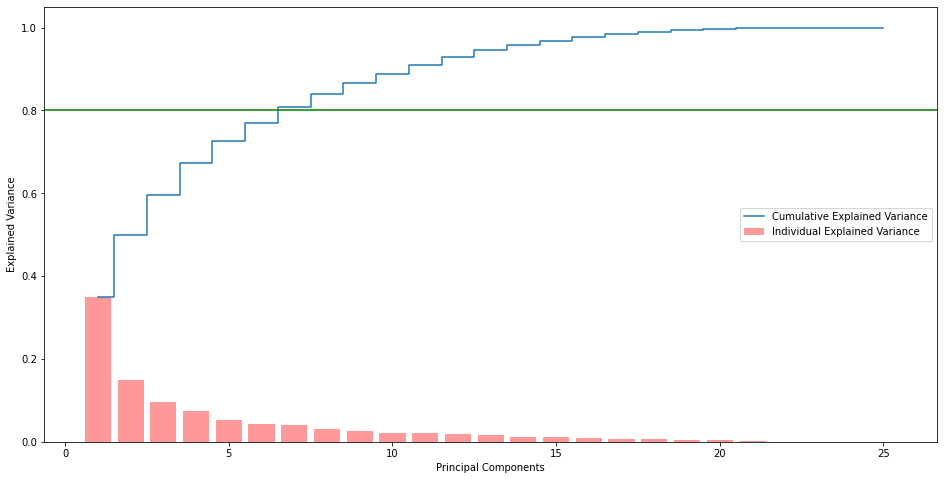

In [6]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
x = scaler.fit_transform(df_players_numerical.values)
df_players_scaled = pd.DataFrame(x, columns=df_players_numerical.columns)
df_players_scaled

pca = PCA()
pca.fit(x)

fig = plt.figure(figsize=(16,8))

plt.step(range(1, df_players_scaled.shape[1]+1), pca.explained_variance_ratio_.cumsum(), where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, df_players_scaled.shape[1]+1), pca.explained_variance_ratio_, alpha =0.4, color='r', label='Individual Explained Variance')
plt.axhline(y=0.8, color='g', linestyle='-')

plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='center right');

In [7]:
n_pc = 4
pca = PCA(n_components=n_pc)
pca.fit(x)

F = abs(pca.components_) #F[i][j] is the proportion of the feature j in the the i-th principal components
v = pca.explained_variance_ratio_ #v[i] is the explained variance of the i-th principal component

feature_variability = v.dot(F) #weighted sum of the importance of a feature respect the principal components

dic = {df_players_scaled.columns[i]: feature_variability[i] for i in range(len(feature_variability))}
df_var = pd.DataFrame(dic.items())
df_var.columns = ['feature', 'variability']
df_var.sort_values(by=['variability'], ascending=False, inplace=True)
df_var

,feature,variability
22,mean_bp_faced,0.148840
17,p_2nd_won,0.141204
4,wins,0.140983
20,p_bp_saved,0.140219
15,p_1st_won,0.140095
19,mean_sv_points,0.138132
16,mean_1st_won,0.135557
14,mean_1st_in,0.133748
18,mean_2nd_won,0.133143
6,w_Hard,0.131444


In [8]:
def entropy(data):
    """Calculates entropy of the passed `pd.Series`
    """
    p_data = data.value_counts()           # counts occurrence of each value
    entropy = scipy.stats.entropy(p_data)  # get entropy from counts
    return entropy

In [9]:
ent = df_players_scaled.apply(entropy, axis=0)

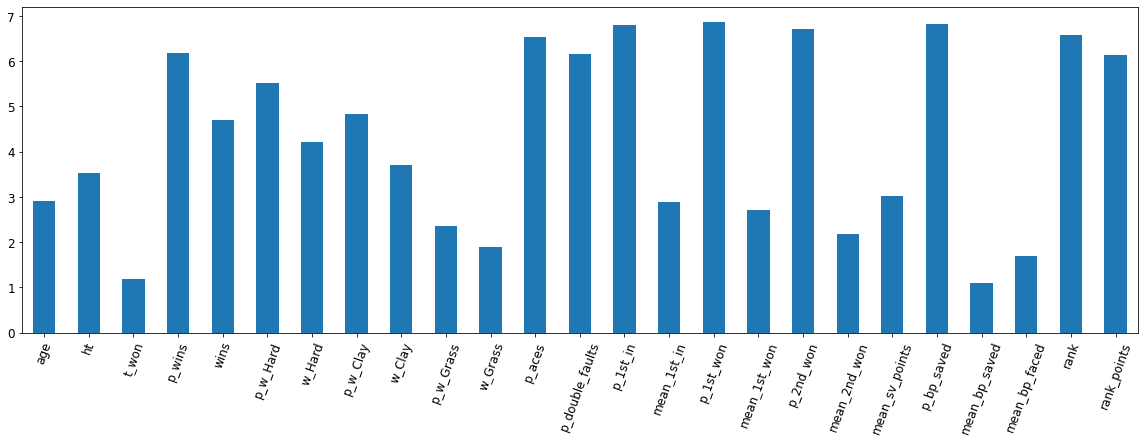

In [10]:
plt.figure(figsize=(20,6))
ent.plot(kind='bar', fontsize=12, rot=70, use_index=True)
plt.xticks(np.arange(ent.size), list(ent.index))
plt.show()

In [11]:
feature_selected = ['p_aces', 'p_1st_in', 'p_2nd_won', 'p_bp_saved']
df_players_numerical = df_players_numerical[feature_selected]

<AxesSubplot:>

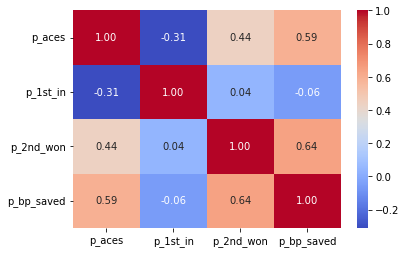

In [12]:
sn.heatmap(df_players_numerical[feature_selected].corr(), annot=True, fmt=".2f", cmap='coolwarm')

In [13]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
x = scaler.fit_transform(df_players_numerical.values)
df_players_scaled = pd.DataFrame(x, columns=df_players_numerical.columns)
df_players_scaled

,p_aces,p_1st_in,p_2nd_won,p_bp_saved
0,1.841208,0.842695,0.667957,0.859233
1,0.853754,-0.925628,-0.027783,2.364583
2,0.091910,-0.821074,0.268551,0.950352
3,0.154034,0.035813,1.696105,2.305736
4,1.242850,-0.666516,0.582922,0.933267
...,...,...,...,...
1595,0.412342,0.188097,0.209284,0.885810
1596,0.964924,0.074452,-0.824018,1.210418
1597,-0.225253,1.545024,0.647342,0.420727
1598,0.503894,0.058542,0.425736,-0.023475


# K-means

In [14]:
sse_list = list()
sil_list = list()
davies_list = list()
max_k = 8
for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over possible K values"):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(x)
    
    davies_list.append(davies_bouldin_score(x, kmeans_iter.labels_))
    sil_list.append(silhouette_score(x, kmeans_iter.labels_))
    sse = kmeans_iter.inertia_
    sse_list.append(sse)

Iterating over possible K values:   0%|          | 0/7 [00:00<?, ?it/s]

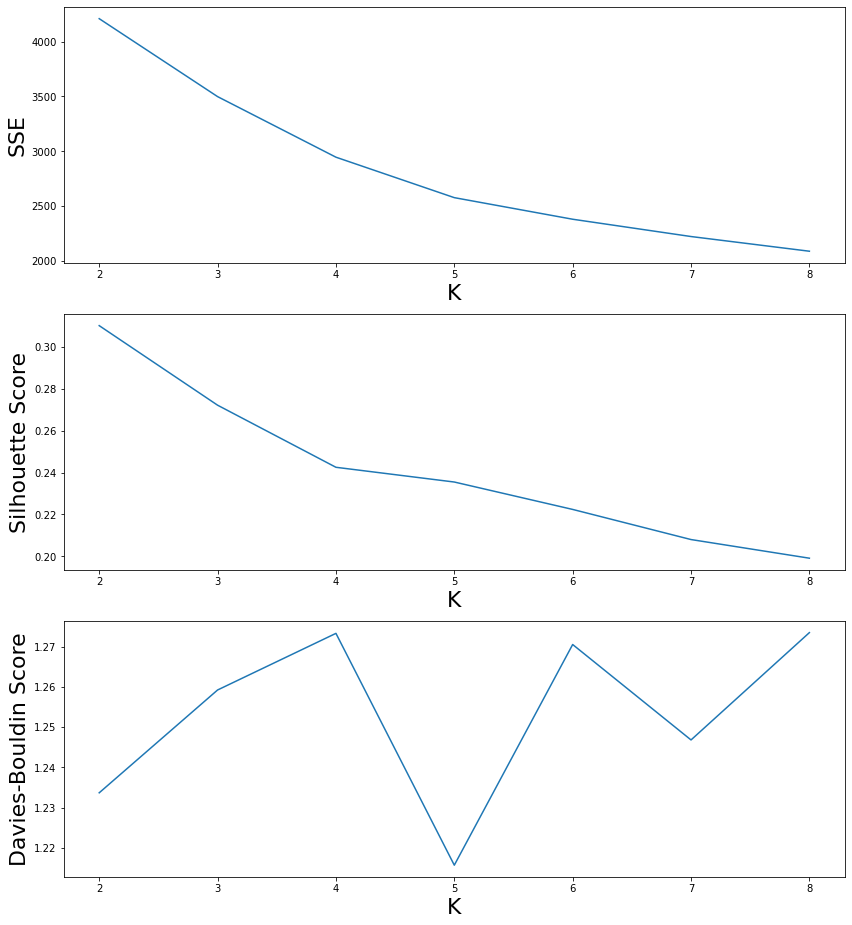

In [15]:
# plot indicators
fig, axs = plt.subplots(3,1,figsize=(14, 16))
label_s = 10

axs[0].plot(range(2, len(sse_list) + 2), sse_list)
axs[0].set_ylabel('SSE', fontsize=22)
axs[0].set_xlabel('K', fontsize=22)
axs[0].tick_params(axis='both', which='major', labelsize=label_s)

axs[1].plot(range(2, len(sil_list) + 2), sil_list)
axs[1].set_ylabel('Silhouette Score', fontsize=22)
axs[1].set_xlabel('K', fontsize=22)
axs[1].tick_params(axis='both', which='major', labelsize=label_s)

axs[2].plot(range(2, len(davies_list) + 2), davies_list)
axs[2].set_ylabel('Davies-Bouldin Score', fontsize=22)
axs[2].set_xlabel('K', fontsize=22)
axs[2].tick_params(axis='both', which='major', labelsize=label_s)

In [16]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=100)
kmeans.fit(x)
print("SSE:",sse_list[k-2]," - SILHOUETTE:",sil_list[k-2])

SSE: 2947.118093443546  - SILHOUETTE: 0.24249631213709122


In [17]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
clust_dict = dict(zip(bins, hist))
print(clust_dict)

{0: 314, 1: 296, 2: 640, 3: 350}


In [18]:
def plot_basic_statistics(df, labels, columns):
    df_plot = pd.DataFrame(df, columns=columns, copy=True)
    df_plot['cluster'] = labels
    columns = df_plot.columns[0:-1]     
    means = []
    std = []
    label_s = 12
    fig = plt.figure(figsize=(14,8))
    for i in np.unique(df_plot['cluster'].array):
        clust = df.loc[df_plot['cluster'] == i, columns]
        means.append(clust.describe().loc['mean'].values)
        std.append(clust.describe().loc['std'].values)  
    legend = []
    for i in np.unique(df_plot['cluster'].array):
        plt.plot(range(0, columns.shape[0]), means[i], marker='o')
        legend.append('Cluster %d' %i)
    plt.legend(legend)
    plt.xticks(range(0, columns.shape[0]), columns, fontsize=label_s, rotation=55)

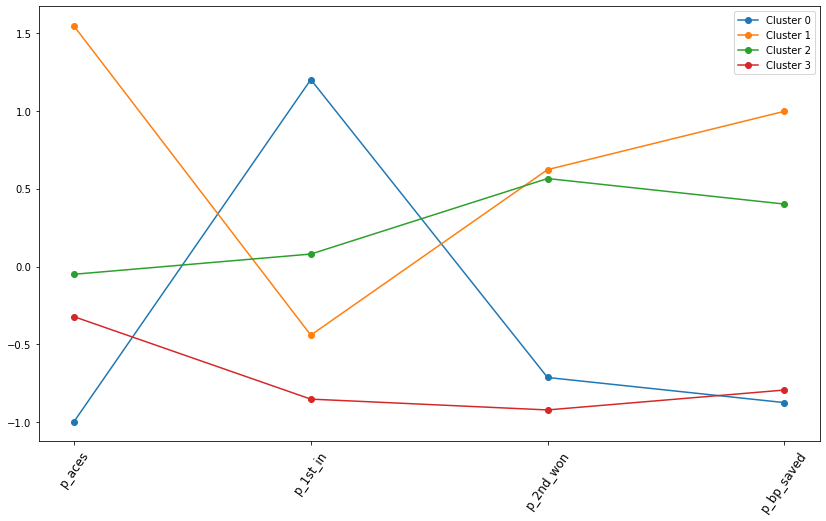

In [19]:
clusters_players = kmeans.labels_
plot_basic_statistics(df_players_scaled, clusters_players, df_players_scaled.columns)

In [20]:
df_players_scaled

,p_aces,p_1st_in,p_2nd_won,p_bp_saved
0,1.841208,0.842695,0.667957,0.859233
1,0.853754,-0.925628,-0.027783,2.364583
2,0.091910,-0.821074,0.268551,0.950352
3,0.154034,0.035813,1.696105,2.305736
4,1.242850,-0.666516,0.582922,0.933267
...,...,...,...,...
1595,0.412342,0.188097,0.209284,0.885810
1596,0.964924,0.074452,-0.824018,1.210418
1597,-0.225253,1.545024,0.647342,0.420727
1598,0.503894,0.058542,0.425736,-0.023475


# Validation

In [25]:
def plot_cross_correlation(df_scaled, cluster_method):
    labels = cluster_method.labels_
    df = pd.DataFrame(df_scaled, copy=True)
    df['cluster'] = labels
    columns = df.columns[0:-1]
    df.sort_values(by='cluster', ascending=True, inplace=True)
    dist_matrix = euclidean_distances(df.loc[:, columns], df.loc[:, columns])
    sim_matrix = np.exp(-dist_matrix)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 
    
    #plt.matshow(dist_matrix, ax=ax1)
    
    df_sim = pd.DataFrame(sim_matrix)  
    sn.heatmap(df_sim, cmap='coolwarm', ax=ax1)
    
    labels.sort()
    n = len(labels)
    inc_matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            if labels[i] == labels[j]: # check the cluster affiliation
                row.append(1) # assign 1 if records belongs to the same cluster, 0 otherwise
            else:
                row.append(0)
        inc_matrix.append(row)

    #plt.matshow(inc_matrix, ax=ax2)
    
    df_inc = pd.DataFrame(inc_matrix)
    sn.heatmap(df_inc, cmap='coolwarm', ax=ax2)
       
    corr_matrix = np.corrcoef(sim_matrix, inc_matrix)
    df_corr = pd.DataFrame(corr_matrix)
    maxx = df_corr.max()
    # visualization
    plt.figure(figsize=(9, 6))
    sn.heatmap(df_corr, cmap='coolwarm')
    return maxx

In [1]:
inc_matrix = []
for i in range(5):
    row = []
    for j in range(3):
        if i==j: # check the cluster affiliation
            row.append(i) # assign 1 if records belongs to the same cluster, 0 otherwise
        else:
            row.append(0)
    inc_matrix.append(row)

In [26]:
maxx = plot_cross_correlation(df_players_scaled, kmeans)

NameError: name 'statistics' is not defined

In [65]:
def validation_clustering(df_scaled, cluster_method, columns):
    labels = cluster_method.labels_
    centers = cluster_method.cluster_centers_
    df = pd.DataFrame(df_scaled, columns=columns, copy=True)
    df['cluster'] = labels
    
    df_entropy = pd.DataFrame(index=range(len(centers)), columns=columns)
    for i in range(min(labels), max(labels)+1):
        df_cluster = df[df['cluster']==i]
        df_cluster = df_cluster.iloc[:,:-1]
        ent = df_cluster.apply(entropy, axis=0)
        df_entropy.at[i,:] = ent

    df_entropy['total'] = df_entropy.sum(axis=1)
    df_entropy['cluster'] = range(min(labels), max(labels)+1)
    #df_entropy.rename(columns={index={'0': 'cluster 0', '1': 'cluster 1', '2': 'cluster 2', '3': 'cluster 3'})
    return df_entropy

In [66]:
df_entropy = validation_clustering(df_players_scaled, kmeans, df_players_scaled.columns)

In [67]:
df_entropy

,p_aces,p_1st_in,p_2nd_won,p_bp_saved,total,cluster
0,5.512312,5.604926,5.510607,5.589675,22.217520,0
1,5.660498,5.659519,5.636528,5.636528,22.593074,1
2,6.023914,6.175576,6.116393,6.195619,24.511503,2
3,5.414507,5.63203,5.534744,5.588407,22.169689,3


In [74]:
l=df_entropy.groupby(by='index').sum()

NameError: name 'df_entropy' is not defined

# Pre-processing

In [ ]:
dist = pdist(X=x, metric='euclidean')  # pair-wise distance: how every record is far from all others
dist = squareform(dist)                # distance matrix given the vector dist

In [ ]:
'''
kmin, kmax = 10, 11
kth_distances = {k:[] for k in range(kmin, kmax + 1)} # initialize k lists

for d in dist:
    # argsort returns the indexes that would sort d
    indexes_to_sort_d = np.argsort(d)
    for k in range(kmin, kmax + 1):
        # append to kth_distances[k] the value in d that corresponds
        # to the distance of the i-th point (record) from its k-th nn.
        # it's like: kth_distances[k].append(sorted_d[k])), but we get "sorted_d[k]" by d[indexes_to_sort_d[k]]
        kth_distances[k].append(d[indexes_to_sort_d[k]])
'''

In [ ]:
'''
plt.figure(figsize=(50, 20))
for k in kth_distances.keys():
    plt.plot(range(0, len(kth_distances[k])), sorted(kth_distances[k]))
plt.xlim((-50, len(x) + 50))
plt.ylim(top=1)
plt.ylabel('distance from k-th nn (eps)', fontsize=40)
plt.xlabel('sorted distances', fontsize=40)
plt.xticks(rotation=-45, fontsize=40)
plt.yticks(fontsize=40)
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()
'''

In [ ]:
k = 10

kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

plt.figure(figsize=(50, 20))    
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.xlim((-50, len(x) + 50))
#plt.ylim(top=1)
plt.ylabel('distance from k-th nn (eps)', fontsize=40)
plt.xlabel('sorted distances', fontsize=40)
plt.xticks(rotation=-45, fontsize=40)
plt.yticks(fontsize=40)
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()  

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(x)

In [ ]:
pca_to_visualize = PCA(n_components=2) 
data_to_visualize = pd.DataFrame(pca_to_visualize.fit_transform(x),columns=['PC_1','PC_2'])
#data_to_visualize = df_players_scaled
data_to_visualize['cluster'] = dbscan.labels_
plt.figure(figsize=(12,8))
sn.scatterplot(x="PC_1", y="PC_2", hue="cluster", data=data_to_visualize, palette='tab10');

In [ ]:
df_players_scaled['cluster'] = dbscan.labels_
sn.pairplot(df_players_scaled, hue='cluster', palette='tab10')
plt.show()

In [ ]:
def plot_basic_statistics(df, labels, columns):
    df = pd.DataFrame(df, columns=columns)
    df['cluster'] = labels
    columns = df.columns[0:-1]     
    means = []
    std = []
    label_s = 15
    fig = plt.figure(figsize=(20,10))
    for i in np.unique(df['cluster'].array):
        clust = df.loc[df['cluster'] == i, columns]
        means.append(clust.describe().loc['mean'].values)
        std.append(clust.describe().loc['std'].values)  
    legend = []
    for i in np.unique(df['cluster'].array):
        plt.plot(range(0, columns.shape[0]), means[i], marker='o')
        legend.append('Cluster %d' %i)
    plt.legend(legend)
    plt.xticks(range(0, columns.shape[0]), columns, fontsize=label_s, rotation=55)
    #plt.xticks(range(0, len(clust_feature.columns)), clust_feature.columns, fontsize=label_s, rotation=55)

In [ ]:
clusters_players = dbscan.labels_
plot_basic_statistics(df_players_scaled, clusters_players, df_players_scaled.columns)

In [ ]:
dbscan.labels_

In [ ]:
clusters_players = dbscan.labels_
df_players_numerical['cluster'] = clusters_players

df_players_numerical = df_players_numerical[df_players_numerical['cluster'] == 0]

df_players_numerical = df_players_numerical.loc[:, df_players_numerical.columns!='cluster']

scaler = StandardScaler()
#scaler = MinMaxScaler()
x = scaler.fit_transform(df_players_numerical.values)
df_players_scaled = pd.DataFrame(x, columns=df_players_numerical.columns)
df_players_scaled

## **K-means**

**Indicators:**

*   **SSE Score** (Inertia): Sum of squared error
*   **Silhouette Score**: It combines both cohesion and separation. Cluster cohesion measures how closely related are objects in a cluster. Typically between 0 and 1, the closer to 1 the better.
*   **Davies Bouldin Score**: It is defined as a ratio of within cluster scatter and the between cluster separation. (Positive indicator, lower value closer to 0 is better).

In [ ]:
sse_list = list()
sil_list = list()
davies_list = list()
max_k = 20
for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over possible K values"):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(X_selected)
    
    davies_list.append(davies_bouldin_score(X_selected, kmeans_iter.labels_))
    sil_list.append(silhouette_score(X_selected, kmeans_iter.labels_))
    sse = kmeans_iter.inertia_
    sse_list.append(sse)

In [ ]:
# plot indicators
fig, axs = plt.subplots(3,1,figsize=(12,22));
label_s = 12

axs[0].plot(range(2, len(sse_list) + 2), sse_list)
axs[0].set_ylabel('SSE', fontsize=22)
axs[0].set_xlabel('K', fontsize=22)
axs[0].tick_params(axis='both', which='major', labelsize=label_s)
axs[0].set_xticks(range(2,max_k+1));

axs[1].plot(range(2, len(sil_list) + 2), sil_list)
axs[1].set_ylabel('Silhouette Score', fontsize=22)
axs[1].set_xlabel('K', fontsize=22)
axs[1].tick_params(axis='both', which='major', labelsize=label_s)
axs[1].set_xticks(range(2,max_k+1));

axs[2].plot(range(2, len(davies_list) + 2), davies_list)
axs[2].set_ylabel('Davies-Bouldin Score', fontsize=22)
axs[2].set_xlabel('K', fontsize=22)
axs[2].tick_params(axis='both', which='major', labelsize=label_s)
axs[2].set_xticks(range(2,max_k+1));

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=100)
kmeans.fit(X_selected)
print("SSE:",sse_list[k-2]," - SILHOUETTE:",sil_list[k-2])

**Using Similarity Matrix for Cluster Validation**: if we have well-separated clusters, then the similarity matrix should be
roughly block-diagonal 

In [ ]:
def plot_similarity_heatmap(df, labels):
    df = pd.DataFrame(df)
    df['cluster'] = labels
    columns = df.columns[0:-1]
    df.sort_values(by='cluster', ascending=False, inplace=True)
    dist = euclidean_distances(df.loc[:, columns], df.loc[:, columns])
    sim = np.exp(-dist)
    fig, ax = plt.subplots(figsize=(12,8))
    sn.heatmap(sim, ax=ax, cmap='coolwarm')

In [ ]:
clusters_players = kmeans.labels_
plot_similarity_heatmap(df_clust_selected_stand, clusters_players)

##Cluster Visualization

In [ ]:
pca = PCA(n_components=2) 
data_to_visualize = pd.DataFrame(pca.fit_transform(X),columns=['PC_1','PC_2'])
data_to_visualize['cluster'] = pd.Categorical(kmeans.labels_)
plt.figure(figsize=(12,8))
sn.scatterplot(x="PC_1",y="PC_2",hue="cluster",data=data_to_visualize);

In [ ]:
def plot_basic_statistics(df, labels, columns):
    df = pd.DataFrame(df, columns=columns)
    df['cluster'] = labels
    columns = df.columns[0:-1]     
    means = []
    std = []
    label_s = 12
    fig = plt.figure(figsize=(18,8))
    for i in np.unique(df['cluster'].array):
        clust = df.loc[df['cluster'] == i, columns]
        means.append(clust.describe().loc['mean'].values)
        std.append(clust.describe().loc['std'].values)  
    legend = []
    for i in np.unique(df['cluster'].array):
        plt.plot(range(0, columns.shape[0]), means[i], marker='o')
        legend.append('Cluster %d' %i)
    plt.legend(legend)
    plt.xticks(range(0, columns.shape[0]), columns, fontsize=label_s, rotation=55)

In [ ]:
clusters_players = kmeans.labels_
plot_basic_statistics(df_clust_selected_stand, clusters_players, df_clust_selected_stand.columns)

In [ ]:
iterables = [df_clust_analyzed.columns, ["mean", "std"]]
columns = pd.MultiIndex.from_product(iterables, names=["feature", "stat"])

labels = kmeans.labels_
df_cluster = pd.DataFrame(index=range(k) ,columns=columns)

In [ ]:
df_cluster

In [ ]:
df_cluster.loc[:, (slice(None), "mean")]

In [ ]:
#df_clustered = pd.crosstab(df_clust_analyzed, kmeans.labels_)
#df_clust[]
labels = kmeans.labels_
#d = {'mean': list(), 'std': [3, 4]}
df_clustered = df_clust_analyzed
df_clustered['cluster ID'] = pd.Series(labels, index = df_clustered.index)
#df.xs('price', level=1, drop_level=False)
df_cluster.loc[:, (slice(None), "mean")] = df_clustered.groupby(by='cluster ID').mean()
#df_cluster.xs('mean', level=1, drop_level=False) = df_clustered.groupby(by='cluster ID').mean()
#df_clustered.groupby(by='cluster ID').mean()

In [ ]:
df_cluster

In [ ]:
df_cluster = pd.DataFrame(df_clust_analyzed, columns=df_clust_analyzed.columns)
df_cluster['cluster'] = kmeans.labels_
columns = df_cluster.columns[0:-1]     
means = []
std = []

for i in np.unique(df_cluster['cluster'].array):
  clust = df.loc[df_cluster['cluster'] == i, columns]
  means.append(clust.describe().loc['mean'].values)
  std.append(clust.describe().loc['std'].values) 

In [ ]:
sex_xt_pct = pd.crosstab(kmeans.labels_,df['sex'])

sex_xt_pct.plot(kind='bar', stacked=False, 
                   title='Sex per cluster')
plt.xlabel('Cluster')
plt.ylabel('Sex')
plt.show()

In [ ]:
# Pairplot
df_player_scaled['cluster'] = kmeans.labels_
sn.pairplot(df_player_scaled, hue='cluster', palette='tab10')
plt.show()

## Centroids

In [30]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_centr = pd.DataFrame(centers, columns=df_players_scaled.columns)
df_centr

,p_aces,p_1st_in,p_2nd_won,p_bp_saved
0,4.103971,57.327200,43.694514,52.196057
1,9.775100,59.181300,49.712500,61.638833
2,4.914859,61.433903,49.445596,58.453981
3,2.043750,66.353077,44.472404,51.743429


In [50]:
from math import pi
def plot_polar_centers(df, centers, columns):
    # number of variable
    N = len(columns)

    plt.figure(figsize = (8,8))
    label_s = 12

    for i in range(0,len(centers)):
        angles = [n / float(N) * 2 * pi for n in range(N)]
        values = centers[i].tolist()
        values += values[:1]
        angles += angles[:1]
        # Initialise the spider plot
        ax = plt.subplot(polar=True)
        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], columns, color='grey', size=label_s) 
        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid')
        # Fill area
        ax.fill(angles, values, 'b', alpha=0.1)

In [51]:
df_players_scaled

,p_aces,p_1st_in,p_2nd_won,p_bp_saved
0,1.841208,0.842695,0.667957,0.859233
1,0.853754,-0.925628,-0.027783,2.364583
2,0.091910,-0.821074,0.268551,0.950352
3,0.154034,0.035813,1.696105,2.305736
4,1.242850,-0.666516,0.582922,0.933267
...,...,...,...,...
1595,0.412342,0.188097,0.209284,0.885810
1596,0.964924,0.074452,-0.824018,1.210418
1597,-0.225253,1.545024,0.647342,0.420727
1598,0.503894,0.058542,0.425736,-0.023475


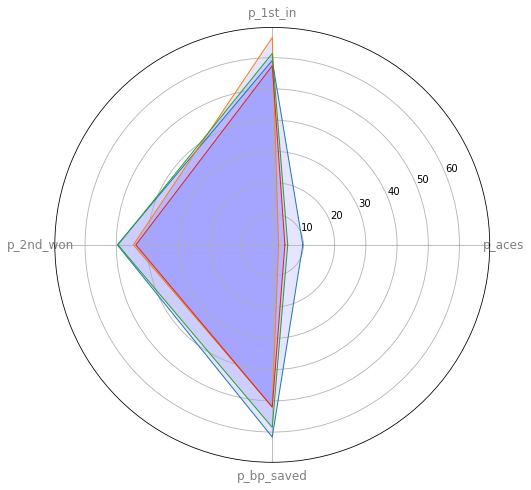

In [52]:
certers = scaler.inverse_transform(kmeans.cluster_centers_)
plot_polar_centers(df_players_numerical, centers, df_players_numerical.columns)

In [55]:
def plot_centers(x, centers, columns, labels):
    
    pca_to_visualize = PCA(n_components=2)
    data_to_visualize = pd.DataFrame(pca_to_visualize.fit_transform(x),columns=['PC_1','PC_2'])
    centers_to_visualize = pca_to_visualize.fit_transform(centers)
    
    plt.figure(figsize=(12,8))
    plt.scatter(data_to_visualize['PC_1'],data_to_visualize['PC_2'], c=labels, s=20)
    plt.scatter(centers_to_visualize[:, 0], centers_to_visualize[:, 1], s=100, marker='*', c='r')
    plt.xlabel('PC_1', fontsize=12)
    plt.ylabel('PC_1', fontsize=12)
    plt.show()

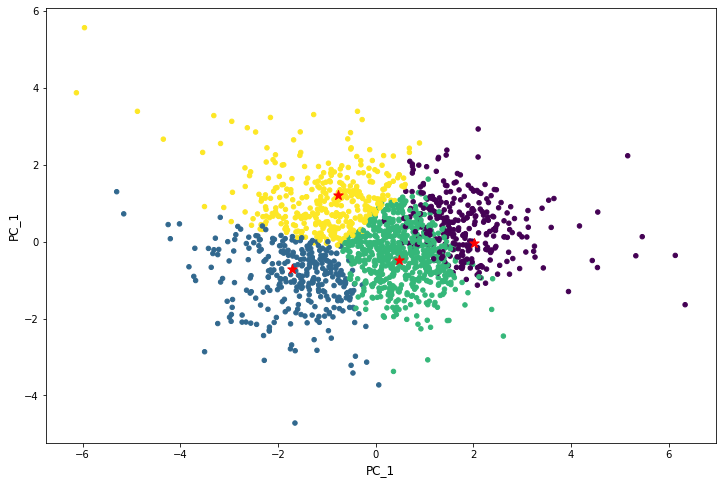

In [56]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
plot_centers(df_players_scaled.values, centers, df_players_scaled.columns, labels)

In [31]:
df_centr['cluster'] = range(len(certers))
df_players_scaled['cluster'] = kmeans.labels_
df_centr = df_centr.rename(index={'0': 'zero', '1': 'one', '2': 'two', '3': 'three'})
df_plot = df_players_scaled.append(df_centr)


In [32]:
df_plot

,p_aces,p_1st_in,p_2nd_won,p_bp_saved,cluster
0,1.841208,0.842695,0.667957,0.859233,2
1,0.853754,-0.925628,-0.027783,2.364583,2
2,0.091910,-0.821074,0.268551,0.950352,1
3,0.154034,0.035813,1.696105,2.305736,1
4,1.242850,-0.666516,0.582922,0.933267,2
...,...,...,...,...,...
1599,1.582900,-0.343763,-0.136009,0.688387,2
0,4.124000,57.322761,43.744225,52.252197,0
1,4.921038,61.480645,49.478931,58.497248,1
2,9.800673,59.132896,49.681212,61.616599,2


ValueError: cannot reindex from a duplicate axis

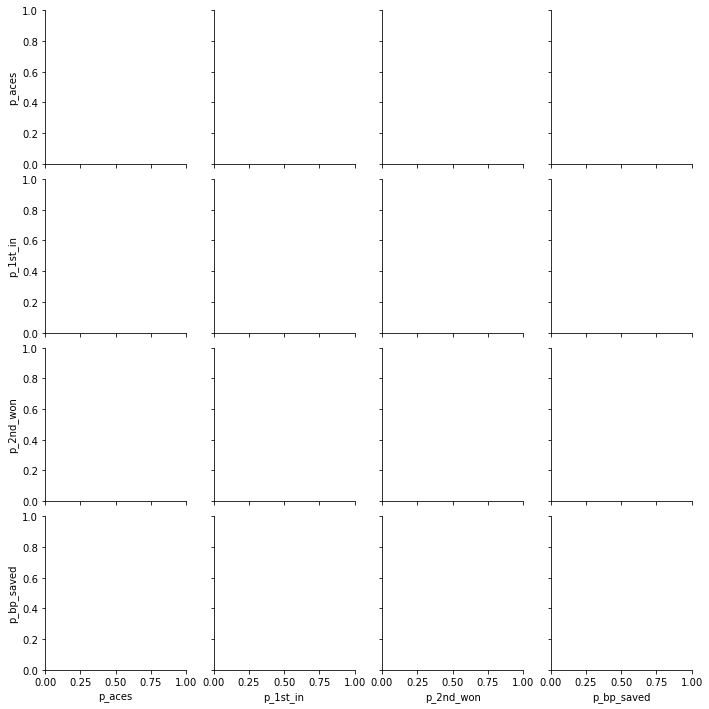

In [37]:
sn.pairplot(df_plot, hue='cluster', palette='tab10')

In [ ]:
df_clust.loc['roger federer']

In [21]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
#fig, axs = plt.subplots(2,2,figsize=(15,15))

label_s = 12
feat1 = 'mean_svPt'
feat2 = 'mean_aces'
col1, i1 = df_clust_selected[feat1], df_clust_selected.columns.get_loc(feat1)
col2, i2 = df_clust_selected[feat2], df_clust_selected.columns.get_loc(feat2)
xlim = df_clust_selected[feat1].max()
ylim = df_clust_selected[feat2].max()
offsetx = df_clust_selected[feat1].max()/20
offsety = df_clust_selected[feat2].max()/20

fig = plt.figure(figsize=(10,8))

plt.scatter(col1, col2, c=kmeans.labels_, s=20)
plt.scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.ylabel(df_clust_selected.columns[i2], fontsize=label_s)
plt.xlabel(df_clust_selected.columns[i1], fontsize=label_s)

NameError: name 'df_clust_selected' is not defined

# DB-scan

In [ ]:
dist = pdist(X=X, metric='euclidean')  # pair-wise distance: how every record is far from all others
dist = squareform(dist)                # distance matrix given the vector dist

In [ ]:
kmin, kmax = 3, 30
kth_distances = {k:[] for k in range(kmin, kmax + 1)} # initialize k lists

for d in dist:
    # argsort returns the indexes that would sort d
    indexes_to_sort_d = np.argsort(d)
    for k in range(kmin, kmax + 1):
        # append to kth_distances[k] the value in d that corresponds
        # to the distance of the i-th point (record) from its k-th nn.
        # it's like: kth_distances[k].append(sorted_d[k])), but we get "sorted_d[k]" by d[indexes_to_sort_d[k]]
        kth_distances[k].append(d[indexes_to_sort_d[k]])

In [ ]:
plt.figure(figsize=(50, 20))
for k in kth_distances.keys():
    plt.plot(range(0, len(kth_distances[k])), sorted(kth_distances[k]))
plt.xlim((-50, len(X) + 50))
plt.ylim(top=1)
plt.ylabel('distance from k-th nn (eps)', fontsize=40)
plt.xlabel('sorted distances', fontsize=40)
plt.xticks(rotation=-45, fontsize=40)
plt.yticks(fontsize=40)
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(range(0,len(kth_distances[kmin])), kmedian, linewidth=1) #kmedian already sorted
plt.ylabel('Median of the k-th nn distances (eps)', fontsize=15)
plt.xlabel('Indexes of the list of the sorted pairwise distances', fontsize=15)
xticks = []

for i in range(0, len(X)-1000, 200): xticks.append(i)

for i in range(4000, len(kth_distances[kmin]), 100): xticks.append(i)

plt.xticks(xticks, rotation=-45, fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(axis='both', which='major')
plt.xlim((3800, 4400))
plt.ylim(top=1)
plt.grid()
low_elb = 4000
high_elb = 4200
plt.axvline(x=low_elb, color='red', linestyle='--', linewidth=1)
plt.axhline(y=sorted(kmedian)[low_elb], color='red', linestyle='--', linewidth=1)
plt.axvline(x=high_elb, color='red', linestyle='--', linewidth=1)
plt.axhline(y=sorted(kmedian)[high_elb], color='red', linestyle='--', linewidth=1)
plt.show()
print("Elbow area of the median of kth-NN distances plot:")
print(f"Low:\tx = {low_elb} --> eps = {kmedian[low_elb]}")  # kmedian is already sorted
print(f"High:\tx = {high_elb} --> eps = {kmedian[high_elb]}")  # kmedian is already sorted